## Deeplearning network 
### individuare la legge di correlazione fra due dati

il presente si propone l' esercizio di :

1. creare il dataset in excel di

    500 triple
    
    --> x1 e x2 e y tali che EQ.A= " 3*x1 +2*x2 = y " 
    
     --> x1 e x2 e y tali che EQ.B=" 5*x1 +3*x2 = y "
    
    
2. creare il dataset in excel di z che sia 0 se EQ.A e 1 se EQ.B


3. esportare il dataset sottoforma di files .CSV
    train.CSV
    test.CSV
    validate.CSV


4. dividere il dataset in "train_data" e "train_solution" ,
                           "test_data" e "test_solution" , 
                           "validate_data" e "validate_solution"

    

In [19]:
# 1. e 2. creato il file dataset.xlsx che contiene nello sheet "dataset" i 500 punti

# 3.

import pandas as pd
data_xls = pd.read_excel('dataset.xlsx', 'dataset', index_col=None)
data_xls.to_csv('dataset.csv', encoding='utf-8',index=False) 

# NOTA : se index=True viene automaticamente aggiunta una colonna (la prima) contenente 
#        un indice progressivo crescente


In [20]:
# visualizziamo i primi 20 punti

# Reading the csv file into a pandas DataFrame
data_glob = pd.read_csv('dataset.csv')

# Printing out the first 10 rows of our data
data_glob[:0]


,x1,x2,z


In [21]:
# 4.

import numpy as np
data_global=np.array(data_glob[["x1","x2","z"]])
data_only=np.array(data_glob[["x1","x2"]])
solution_only=np.array(data_glob[["z"]])

train_data=np.array(data_only[0:250])  # NOTA: la [ è inclusiva la ] è esclusiva
train_solution=np.array(solution_only[0:250])

test_data=np.array(data_only[250:375])
test_solution=np.array(solution_only[250:375])

validate_data=np.array(data_only[375:501])
validate_solution=np.array(solution_only[375:501])


print ("train_data size:" , train_data.size/3, "train_solution size", train_solution.size)
print ("test_data size:" , test_data.size/3, "test_solution size", test_solution.size)
print ("validate_data size:" , validate_data.size/3, "validate_solution size", validate_solution.size)
print (train_data[:10]) 
print (train_solution[:10])


train_data size: 166.66666666666666 train_solution size 250
test_data size: 83.33333333333333 test_solution size 125
validate_data size: 83.33333333333333 validate_solution size 125
[[-87  25]
 [ 20 -54]
 [ 74 -94]
 [ 91  44]
 [ 65 -84]
 [ 42  91]
 [-68  29]
 [ 50 -41]
 [ 93  29]
 [ 42  28]]
[[1]
 [0]
 [1]
 [0]
 [0]
 [0]
 [0]
 [1]
 [0]
 [0]]


In [22]:
print (train_data[0])
print (train_data[0][2])

[-87  25]


IndexError: index 2 is out of bounds for axis 0 with size 2

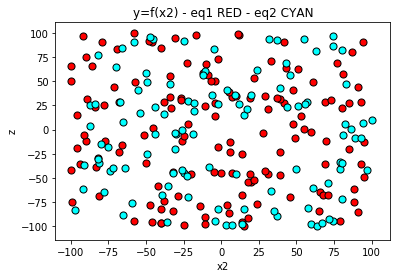

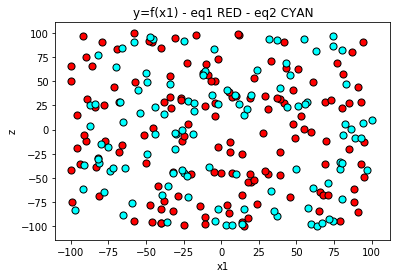

In [25]:
# visualizzare la dipendenza (x1,y) e (x2,y) per le due equazioni (differenti colori), in modo da rendere visibile già una 
# relazione fra i valori e una diversa tendenza nelle due equazioni.
# il plot è ottenuto mediante la costruzione di una funzione di plot


# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

# Function to help us plot
def plot_points_x2(train_data,train_solution):
    
    eq1 = train_data[np.argwhere(train_solution==0)]   # da ricordare!!!
    #print (eq1[:3])
    eq2 = train_data[np.argwhere(train_solution==1)] 
    plt.scatter([s[0][0] for s in eq1], [s[0][1] for s in eq1], s = 50, color = 'red', edgecolor = 'k')
    # s= 50 è la grandezza del punto
    plt.scatter([s[0][0] for s in eq2], [s[0][1] for s in eq2], s = 50, color = 'cyan', edgecolor = 'k')
    plt.xlabel('x2')
    plt.ylabel('z')
    plt.title("y=f(x2) - eq1 RED - eq2 CYAN")
# Function to help us plot
def plot_points_x1(train_data,train_solution):
    
    eq1 = train_data[np.argwhere(train_solution==0)]   # da ricordare!!!
    #print (eq1[:3])
    eq2 = train_data[np.argwhere(train_solution==1)] 
    plt.scatter([s[0][0] for s in eq1], [s[0][1] for s in eq1], s = 50, color = 'red', edgecolor = 'k')
    # s= 50 è la grandezza del punto
    plt.scatter([s[0][0] for s in eq2], [s[0][1] for s in eq2], s = 50, color = 'cyan', edgecolor = 'k')
    plt.xlabel('x1')
    plt.ylabel('z')
    plt.title("y=f(x1) - eq1 RED - eq2 CYAN")
# Plotting the points
plot_points_x2(train_data,train_solution)

plt.show()
plot_points_x1(train_data,train_solution)
plt.show()

[[[ 20 -54]
  [-87  25]]

 [[ 91  44]
  [-87  25]]

 [[ 65 -84]
  [-87  25]]

 [[ 42  91]
  [-87  25]]

 [[-68  29]
  [-87  25]]]


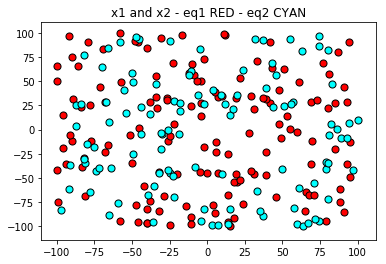

In [26]:
# visualizzare i punti (x1,x2) delle due equazioni, sono coppie casuali nel range di valori [-100,100]
# questo plot è ottenuto senza il richiamo della funzione

# Importing matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
eq1_ = train_data[np.argwhere(train_solution==0)]   # da ricordare!!!
eq2_ = train_data[np.argwhere(train_solution==1)]   # da ricordare!!!
print (eq1_[:5])
plt.scatter([s[0][0] for s in eq1_], [s[0][1] for s in eq1_], s = 50, color = 'red', edgecolor = 'k')
#plt.show()
plt.scatter([s[0][0] for s in eq2_], [s[0][1] for s in eq2_], s = 50, color = 'cyan', edgecolor = 'k')
plt.title("x1 and x2 - eq1 RED - eq2 CYAN")
plt.show()

   ## definiamo le funzioni base

In [28]:
def dimensions(data):
    input_number=data_global[0].size - 1 # legge quante sono le variabili indipendenti
    
    return input_number
dimensions(data_glob)

2

In [29]:
# la rete avrà :
''' 1 layer
    n input (pari al numero di variabili indipendenti)
    m output (sempre 2 per la rete in esempio )'''
# date le dimensioni volute crea e inizializza una matrice dei pesi con media zero
# e deviazione standard 1\sqrt{n*m}

def weight_create(n,m):
    size=n*m
    weights = np.random.normal(loc=0.0,scale=1 / size**.5, size=(n,m))
    return (weights)

In [30]:
def sigmoid(x):
    h=1/(1+np.exp(-x))
    return h

In [31]:
def sigmoid_prime(x):
    h=sigmoid(x)*(1-sigmoid(x))
    return h

In [ ]:
def net_create(n,m)

In [32]:
def train(input_data,true_output,weights,bias)
    epochs= 100  # definiamo il numero di epoche
    learn_rate=0.5 # definiamo la learning rate
    
    for e in epochs:
        del_w = np.zeros(weights.shape)   # inizializzo a una matrice di zeri la variazione alla matrice weights
                                         # poiche ogni epoca ho finito il calcolo di quanto deve variare 
        for x,y in zip(input_data,true_output):
            h=np.dot(x,weights)
            h=sigmoid(x)
            
        
    

SyntaxError: invalid syntax (<ipython-input-32-e7b29391178b>, line 1)